# Agregación de datos por categoría

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
genero = ["Hombre", "Mujer"]
estatus = ["Bajos", "Clase Media", "Rico"]

In [3]:
n = 500

genero_data = []
estatus_data = []

for i in range(0,n): # Manera de crear un dummy data frame, escogiendo alguna opcíón al azar de alguna variable.
    genero_data.append(np.random.choice(genero)) 
    estatus_data.append(np.random.choice(estatus))

In [4]:
genero_data[1:10]

['Hombre',
 'Hombre',
 'Mujer',
 'Hombre',
 'Hombre',
 'Hombre',
 'Hombre',
 'Hombre',
 'Hombre']

In [5]:
estatus_data[1:10]

['Clase Media',
 'Rico',
 'Rico',
 'Clase Media',
 'Clase Media',
 'Rico',
 'Bajos',
 'Rico',
 'Clase Media']

In [6]:
altura_data = 160 + 30*np.random.randn(n)
altura_data = abs(altura_data.round(2))
peso_data = 65 + 25*np.random.randn(n)
peso_data = abs(peso_data.round(2))
edad_data = 30 + 12*np.random.randn(n)
edad_data = abs(edad_data.astype(int))
ingresos_data = 18000 + 3500*np.random.randn(n)
ingresos_data = abs(ingresos_data.astype(int))

In [7]:
data = pd.DataFrame(
    {
        "Genero": genero_data,
        "Estatus": estatus_data,
        "Altura": altura_data,
        "Peso": peso_data,
        "Edad": edad_data,
        "Ingresos" : ingresos_data 
    }
)

In [8]:
data.head()

,Genero,Estatus,Altura,Peso,Edad,Ingresos
0,Mujer,Bajos,161.19,32.82,15,13636
1,Hombre,Clase Media,205.32,78.47,46,22567
2,Hombre,Rico,132.39,51.09,26,11789
3,Mujer,Rico,164.00,5.16,1,22239
4,Hombre,Clase Media,194.25,81.76,36,20515


In [9]:
data.describe()

,Altura,Peso,Edad,Ingresos
count,500.000000,500.000000,500.000000,500.000000
mean,161.981580,64.141000,29.120000,18184.932000
std,29.276108,25.177645,11.983021,3671.815724
min,78.090000,1.390000,1.000000,9349.000000
25%,143.390000,48.165000,21.000000,15548.750000
50%,162.845000,65.155000,29.000000,18154.500000
75%,182.895000,81.190000,37.000000,20718.250000
max,240.140000,140.350000,69.000000,28149.000000


## Agrupación de datos

In [10]:
genero_agrupado = data.groupby("Genero") # Manera de agrupar datos.
genero_agrupado.groups

{'Hombre': [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 21, 22, 23, 27, 29, 32, 33, 35, 36, 37, 39, 41, 42, 44, 45, 46, 47, 50, 51, 54, 55, 59, 63, 64, 67, 69, 75, 81, 82, 84, 86, 90, 92, 96, 97, 100, 105, 109, 110, 114, 116, 117, 118, 119, 120, 123, 126, 129, 131, 132, 135, 137, 138, 139, 142, 144, 145, 147, 148, 152, 157, 158, 162, 163, 164, 165, 166, 167, 168, 171, 172, 174, 175, 176, 177, 178, 182, 187, 188, 191, 192, 193, 194, 195, 200, 201, ...], 'Mujer': [0, 3, 10, 14, 17, 19, 20, 24, 25, 26, 28, 30, 31, 34, 38, 40, 43, 48, 49, 52, 53, 56, 57, 58, 60, 61, 62, 65, 66, 68, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 83, 85, 87, 88, 89, 91, 93, 94, 95, 98, 99, 101, 102, 103, 104, 106, 107, 108, 111, 112, 113, 115, 121, 122, 124, 125, 127, 128, 130, 133, 134, 136, 140, 141, 143, 146, 149, 150, 151, 153, 154, 155, 156, 159, 160, 161, 169, 170, 173, 179, 180, 181, 183, 184, 185, 186, 189, 190, 196, 197, ...]}

In [11]:
for nombres,grupos in genero_agrupado:
    print(nombres)
    print(grupos)

Hombre
     Genero      Estatus  Altura   Peso  Edad  Ingresos
1    Hombre  Clase Media  205.32  78.47    46     22567
2    Hombre         Rico  132.39  51.09    26     11789
4    Hombre  Clase Media  194.25  81.76    36     20515
5    Hombre  Clase Media  189.75  40.98    29     12299
6    Hombre         Rico  165.15  77.72    34     24285
..      ...          ...     ...    ...   ...       ...
483  Hombre  Clase Media  211.41  79.45    32     20214
486  Hombre        Bajos  219.82  65.48    39     25796
489  Hombre  Clase Media  219.63  72.17    59     18765
492  Hombre  Clase Media  142.47  47.04    40     18349
495  Hombre  Clase Media  151.67  32.07    30     16868

[264 rows x 6 columns]
Mujer
    Genero      Estatus  Altura    Peso  Edad  Ingresos
0    Mujer        Bajos  161.19   32.82    15     13636
3    Mujer         Rico  164.00    5.16     1     22239
10   Mujer         Rico  188.33   52.93    35     21259
14   Mujer  Clase Media  167.10   57.14    16     17805
17   Mujer 

In [12]:
genero_agrupado.get_group("Mujer")

,Genero,Estatus,Altura,Peso,Edad,Ingresos
0,Mujer,Bajos,161.19,32.82,15,13636
3,Mujer,Rico,164.00,5.16,1,22239
10,Mujer,Rico,188.33,52.93,35,21259
14,Mujer,Clase Media,167.10,57.14,16,17805
17,Mujer,Bajos,212.76,28.86,17,12465
...,...,...,...,...,...,...
494,Mujer,Rico,146.75,71.21,49,22299
496,Mujer,Rico,174.05,68.40,44,14396
497,Mujer,Bajos,201.25,55.57,40,21546
498,Mujer,Bajos,129.18,94.22,19,17919


In [13]:
doble_agrupacion = data.groupby(["Genero", "Estatus"]) # Manera de agrupar datos, por dos parámetros

In [14]:
for nombres,grupos in doble_agrupacion:
    print(nombres)
    print(grupos)

('Hombre', 'Bajos')
     Genero Estatus  Altura   Peso  Edad  Ingresos
7    Hombre   Bajos  166.00  91.65    37     19989
13   Hombre   Bajos  136.05  90.61    25     22437
15   Hombre   Bajos  138.12  24.49    24     19905
22   Hombre   Bajos  207.47  90.05    42     14525
32   Hombre   Bajos  167.00   1.39    33     15425
..      ...     ...     ...    ...   ...       ...
455  Hombre   Bajos  155.34  52.14    12     15260
456  Hombre   Bajos  117.42  73.15    34     19834
461  Hombre   Bajos  194.35  78.90    36     17554
480  Hombre   Bajos  202.60  65.38    27     19309
486  Hombre   Bajos  219.82  65.48    39     25796

[90 rows x 6 columns]
('Hombre', 'Clase Media')
     Genero      Estatus  Altura    Peso  Edad  Ingresos
1    Hombre  Clase Media  205.32   78.47    46     22567
4    Hombre  Clase Media  194.25   81.76    36     20515
5    Hombre  Clase Media  189.75   40.98    29     12299
9    Hombre  Clase Media  146.86   48.66     3     21376
11   Hombre  Clase Media  125.13  

In [15]:
doble_agrupacion.get_group(('Hombre', 'Bajos')) # Manera de obtener alguna agrupación

,Genero,Estatus,Altura,Peso,Edad,Ingresos
7,Hombre,Bajos,166.00,91.65,37,19989
13,Hombre,Bajos,136.05,90.61,25,22437
15,Hombre,Bajos,138.12,24.49,24,19905
22,Hombre,Bajos,207.47,90.05,42,14525
32,Hombre,Bajos,167.00,1.39,33,15425
...,...,...,...,...,...,...
455,Hombre,Bajos,155.34,52.14,12,15260
456,Hombre,Bajos,117.42,73.15,34,19834
461,Hombre,Bajos,194.35,78.90,36,17554
480,Hombre,Bajos,202.60,65.38,27,19309


## Operaciones sobre datos agrupados

In [16]:
doble_agrupacion.sum()

Altura     Peso  Edad  Ingresos
Genero Estatus                                       
Hombre Bajos        15140.10  5516.45  2628   1661770
       Clase Media  16114.00  5831.71  2882   1786140
       Rico         12476.44  5239.85  2227   1400163
Mujer  Bajos        12378.38  5029.41  2342   1385240
       Clase Media  13128.88  5412.35  2259   1510911
       Rico         11752.99  5040.73  2222   1348242

In [17]:
doble_agrupacion.mean()

Altura       Peso       Edad      Ingresos
Genero Estatus                                                    
Hombre Bajos        168.223333  61.293889  29.200000  18464.111111
       Clase Media  166.123711  60.120722  29.711340  18413.814433
       Rico         162.031688  68.050000  28.922078  18183.935065
Mujer  Bajos        158.697179  64.479615  30.025641  17759.487179
       Clase Media  158.179277  65.209036  27.216867  18203.746988
       Rico         156.706533  67.209733  29.626667  17976.560000

In [18]:
doble_agrupacion.size()

Genero  Estatus    
Hombre  Bajos          90
        Clase Media    97
        Rico           77
Mujer   Bajos          78
        Clase Media    83
        Rico           75
dtype: int64

In [19]:
doble_agrupacion.describe()

Altura                                                  \
                    count        mean        std    min       25%     50%   
Genero Estatus                                                              
Hombre Bajos         90.0  168.223333  29.454908  95.20  146.3400  166.38   
       Clase Media   97.0  166.123711  31.091581  78.09  145.3900  169.77   
       Rico          77.0  162.031688  28.505813  84.92  146.3600  161.40   
Mujer  Bajos         78.0  158.697179  27.487008  95.06  134.6675  157.02   
       Clase Media   83.0  158.179277  28.326900  86.48  138.0650  160.13   
       Rico          75.0  156.706533  29.094711  87.98  140.3600  157.92   

                                     Peso             ...  Edad        \
                        75%     max count       mean  ...   75%   max   
Genero Estatus                                        ...               
Hombre Bajos        189.595  237.20  90.0  61.293889  ...  38.0  69.0   
       Clase Media  189.640  235.06  97.0  60.120722  ...  36.0  66.0   
       Rico         179.000  230.87  77.0  68.050000  ...  34.0  59.0   
Mujer  Bajos        182.735  212.76  78.0  64.479615  ...  39.0  59.0   
       Clase Media  176.775  213.59  83.0  65.209036  ...  36.5  55.0   
       Rico         176.800  240.14  75.0  67.209733  ...  37.5  53.0   

                   Ingresos                                                \
                      count          mean          std      min       25%   
Genero Estatus                                                              
Hombre Bajos           90.0  18464.111111  3194.210868  10603.0  16307.00   
       Clase Media     97.0  18413.814433  3648.913141   9483.0  16168.00   
       Rico            77.0  18183.935065  4036.352279   9349.0  14803.00   
Mujer  Bajos           78.0  17759.487179  3688.038953  10368.0  15151.75   
       Clase Media     83.0  18203.746988  3998.663054   9570.0  15573.00   
       Rico            75.0  17976.560000  3516.788835  10212.0  15940.00   

                                                
                        50%       75%      max  
Genero Estatus                                  
Hombre Bajos        18578.5  20414.25  27177.0  
       Clase Media  18114.0  21043.00  26465.0  
       Rico         18627.0  20782.00  28149.0  
Mujer  Bajos        17615.0  20587.25  27002.0  
       Clase Media  18139.0  21231.50  27888.0  
       Rico         17638.0  20441.50  26865.0  

[6 rows x 32 columns]

In [20]:
doble_agrupacion_ingresos = doble_agrupacion["Ingresos"]

In [21]:
doble_agrupacion_ingresos.describe()

count          mean          std      min       25%  \
Genero Estatus                                                            
Hombre Bajos         90.0  18464.111111  3194.210868  10603.0  16307.00   
       Clase Media   97.0  18413.814433  3648.913141   9483.0  16168.00   
       Rico          77.0  18183.935065  4036.352279   9349.0  14803.00   
Mujer  Bajos         78.0  17759.487179  3688.038953  10368.0  15151.75   
       Clase Media   83.0  18203.746988  3998.663054   9570.0  15573.00   
       Rico          75.0  17976.560000  3516.788835  10212.0  15940.00   

                        50%       75%      max  
Genero Estatus                                  
Hombre Bajos        18578.5  20414.25  27177.0  
       Clase Media  18114.0  21043.00  26465.0  
       Rico         18627.0  20782.00  28149.0  
Mujer  Bajos        17615.0  20587.25  27002.0  
       Clase Media  18139.0  21231.50  27888.0  
       Rico         17638.0  20441.50  26865.0

In [22]:
doble_agrupacion.aggregate(
    {
        "Ingresos": np.sum,
        "Edad": np.mean,
        "Altura": np.std
    }
)

Ingresos       Edad     Altura
Genero Estatus                                    
Hombre Bajos         1661770  29.200000  29.454908
       Clase Media   1786140  29.711340  31.091581
       Rico          1400163  28.922078  28.505813
Mujer  Bajos         1385240  30.025641  27.487008
       Clase Media   1510911  27.216867  28.326900
       Rico          1348242  29.626667  29.094711

In [23]:
doble_agrupacion.aggregate(
    {
        "Edad": np.mean,
        "Altura": lambda a: np.mean(a)/np.std(a)
    }
)

Edad    Altura
Genero Estatus                         
Hombre Bajos        29.200000  5.743212
       Clase Media  29.711340  5.370801
       Rico         28.922078  5.721437
Mujer  Bajos        30.025641  5.810904
       Clase Media  27.216867  5.618012
       Rico         29.626667  5.422354

In [24]:
doble_agrupacion.aggregate([np.sum,np.mean,np.std])

Altura                            Peso             \
                         sum        mean        std      sum       mean   
Genero Estatus                                                            
Hombre Bajos        15140.10  168.223333  29.454908  5516.45  61.293889   
       Clase Media  16114.00  166.123711  31.091581  5831.71  60.120722   
       Rico         12476.44  162.031688  28.505813  5239.85  68.050000   
Mujer  Bajos        12378.38  158.697179  27.487008  5029.41  64.479615   
       Clase Media  13128.88  158.179277  28.326900  5412.35  65.209036   
       Rico         11752.99  156.706533  29.094711  5040.73  67.209733   

                               Edad                       Ingresos  \
                          std   sum       mean        std      sum   
Genero Estatus                                                       
Hombre Bajos        26.592485  2628  29.200000  12.963388  1661770   
       Clase Media  24.440663  2882  29.711340  12.419708  1786140   
       Rico         23.764253  2227  28.922078  11.111595  1400163   
Mujer  Bajos        26.345130  2342  30.025641  11.825544  1385240   
       Clase Media  24.115761  2259  27.216867  12.291230  1510911   
       Rico         25.390114  2222  29.626667  10.983739  1348242   

                                               
                            mean          std  
Genero Estatus                                 
Hombre Bajos        18464.111111  3194.210868  
       Clase Media  18413.814433  3648.913141  
       Rico         18183.935065  4036.352279  
Mujer  Bajos        17759.487179  3688.038953  
       Clase Media  18203.746988  3998.663054  
       Rico         17976.560000  3516.788835

In [25]:
doble_agrupacion.aggregate([lambda x: np.mean(x)/np.std(x)])

Altura      Peso      Edad  Ingresos
                    <lambda>  <lambda>  <lambda>  <lambda>
Genero Estatus                                            
Hombre Bajos        5.743212  2.317846  2.265117  5.812876
       Clase Media  5.370801  2.472643  2.404701  5.072598
       Rico         5.721437  2.882322  2.619942  4.534583
Mujer  Bajos        5.810904  2.463338  2.555484  4.846596
       Clase Media  5.618012  2.720439  2.227793  4.580133
       Rico         5.422354  2.664908  2.715485  5.146063

## Filtrado de datos

In [26]:
doble_agrupacion.sum()

Altura     Peso  Edad  Ingresos
Genero Estatus                                       
Hombre Bajos        15140.10  5516.45  2628   1661770
       Clase Media  16114.00  5831.71  2882   1786140
       Rico         12476.44  5239.85  2227   1400163
Mujer  Bajos        12378.38  5029.41  2342   1385240
       Clase Media  13128.88  5412.35  2259   1510911
       Rico         11752.99  5040.73  2222   1348242

In [27]:
    doble_agrupacion["Edad"].filter(lambda x: x.sum() > 2400)

1      46
4      36
5      29
7      37
9       3
       ..
483    32
486    39
489    59
492    40
495    30
Name: Edad, Length: 187, dtype: int32

## Transformación de variables

In [28]:
zscore = lambda x: (x - x.mean()) / x.std() # Una puntuación z mide exactamente cuántas desviaciones estándar por encima o por debajo de la media está un punto de datos.


In [29]:
z_group = doble_agrupacion.transform(zscore) # Manera de transformar los datos mediante la funciín zscore, la cual es la puntuación z.

(array([  9.,  18.,  75.,  81., 130.,  83.,  64.,  24.,  10.,   6.]),
 array([-2.60627703, -2.03863083, -1.47098463, -0.90333843, -0.33569223,
         0.23195396,  0.79960016,  1.36724636,  1.93489256,  2.50253876,
         3.07018496]),
 <BarContainer object of 10 artists>)

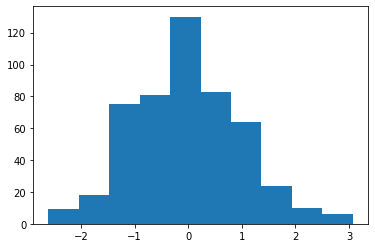

In [30]:
plt.hist(z_group["Edad"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
doble_agrupacion.transform(fill_na_mean) # Manera de transfomar los valores mediante la función fill_na_mean

,Altura,Peso,Edad,Ingresos
0,161.19,32.82,15,13636
1,205.32,78.47,46,22567
2,132.39,51.09,26,11789
3,164.00,5.16,1,22239
4,194.25,81.76,36,20515
...,...,...,...,...
495,151.67,32.07,30,16868
496,174.05,68.40,44,14396
497,201.25,55.57,40,21546
498,129.18,94.22,19,17919


## Operaciones diversas muy útiles

In [33]:
doble_agrupacion.head(1) # Manera de pedir el primer dato de cada agrupación

,Genero,Estatus,Altura,Peso,Edad,Ingresos
0,Mujer,Bajos,161.19,32.82,15,13636
1,Hombre,Clase Media,205.32,78.47,46,22567
2,Hombre,Rico,132.39,51.09,26,11789
3,Mujer,Rico,164.00,5.16,1,22239
7,Hombre,Bajos,166.00,91.65,37,19989
14,Mujer,Clase Media,167.10,57.14,16,17805


In [34]:
doble_agrupacion.tail(1) # Manera de pedir el último dato de cada agrupación

,Genero,Estatus,Altura,Peso,Edad,Ingresos
481,Hombre,Rico,171.89,65.21,17,15399
486,Hombre,Bajos,219.82,65.48,39,25796
491,Mujer,Clase Media,143.43,44.22,17,21692
495,Hombre,Clase Media,151.67,32.07,30,16868
498,Mujer,Bajos,129.18,94.22,19,17919
499,Mujer,Rico,181.68,115.74,6,12392


In [35]:
doble_agrupacion.nth(32) # Manera de pedir el dato n-ésimo de cada agrupación

Altura    Peso  Edad  Ingresos
Genero Estatus                                    
Hombre Bajos        197.99   73.36    45     19736
       Clase Media  175.94   67.95    17     20823
       Rico          87.22   63.05    24     15427
Mujer  Bajos        154.90  132.22    14     17115
       Clase Media  148.49   58.37    16     15443
       Rico         145.21   71.05    21     20083

In [36]:
doble_agrupacion.nth(82)

Altura   Peso  Edad  Ingresos
Genero Estatus                                   
Hombre Bajos        169.02  28.61    43     16871
       Clase Media  184.06  36.12    17     16168
Mujer  Clase Media  143.43  44.22    17     21692

In [37]:
data_sorted = data.sort_values(["Edad", "Ingresos"])

In [38]:
data_sorted.head(10)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
50,Hombre,Bajos,193.19,41.10,1,18996
237,Hombre,Bajos,145.49,28.94,1,20565
3,Mujer,Rico,164.00,5.16,1,22239
177,Hombre,Rico,183.13,103.72,2,14383
452,Hombre,Rico,178.39,69.25,2,16583
163,Hombre,Clase Media,165.42,108.87,2,17560
9,Hombre,Clase Media,146.86,48.66,3,21376
468,Mujer,Clase Media,132.83,37.82,5,15212
118,Hombre,Bajos,165.54,55.59,5,18740
242,Mujer,Bajos,173.48,21.96,5,20264


In [39]:
edad_grupo = data_sorted.groupby("Genero")

In [40]:
edad_grupo.head(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
50,Hombre,Bajos,193.19,41.10,1,18996
3,Mujer,Rico,164.00,5.16,1,22239


In [41]:
edad_grupo.tail(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
463,Mujer,Bajos,103.52,44.51,59,21966
142,Hombre,Bajos,133.99,89.74,69,20256


## Conjunto de entrenamiento y conjunto de testing

In [42]:
mainpath = mainpath = "/Users/Ricar/Documents/Proyectos/MACHINE LEARNING - UDEMY/Datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath,filename)

In [43]:
data = pd.read_csv(fullpath)

In [44]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [45]:
data.shape

(3333, 21)

### Dividir utilizando la distribución normal

In [46]:
a  = np.random.randn(len(data))

(array([ 23., 112., 275., 659., 822., 744., 439., 184.,  58.,  17.]),
 array([-3.00860805, -2.38066951, -1.75273097, -1.12479242, -0.49685388,
         0.13108467,  0.75902321,  1.38696176,  2.0149003 ,  2.64283885,
         3.27077739]),
 <BarContainer object of 10 artists>)

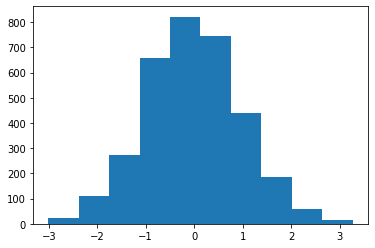

In [47]:
plt.hist(a)

In [60]:
check = (a < 0.75)

(array([ 705.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2628.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

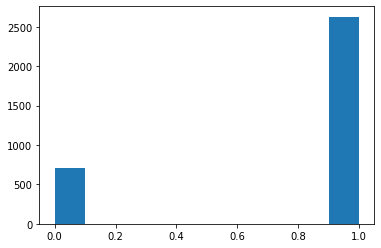

In [61]:
plt.hist(check.astype(int))

In [62]:
training = data[check]
testing = data[~check]


In [63]:
len(training)


2628

In [64]:
len(testing)

705

### Con la libreria sklearn

In [70]:
train, test = train_test_split(data,test_size=0.2)

In [71]:
len(train)

2666

In [72]:
len(test)

667

### Usando una función de shuffle

In [74]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [75]:
data = sklearn.utils.shuffle(data)

In [76]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1747,KS,120,510,392-5605,no,no,0,158.0,110,26.86,...,103,16.75,154.9,132,6.97,10.0,5,2.70,1,False.
2001,TX,73,408,340-8323,no,no,0,286.4,109,48.69,...,67,15.15,214.2,152,9.64,10.7,14,2.89,1,True.
393,PA,112,510,352-9017,no,no,0,217.1,76,36.91,...,100,17.44,185.7,91,8.36,9.4,3,2.54,2,False.
1074,ME,177,415,406-8809,no,no,0,232.8,106,39.58,...,97,14.89,212.2,77,9.55,12.5,7,3.38,2,False.
1045,TX,217,408,385-7082,no,no,0,176.4,115,29.99,...,128,13.50,306.6,107,13.80,9.3,3,2.51,4,False.


In [79]:
id_corte = int(0.75*len(data))
train_data = data[:id_corte]
test_data = data[id_corte+1:]

In [80]:
len(train_data)


2499

In [81]:
len(test_data)

833